In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
with open('intents.json') as f:
    data = json.load(f)

In [3]:
tags = []
inputs = []
responses= {}
for intent in data['intents']:
  responses[intent['tag']] = intent['response']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [4]:
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})
data

,inputs,tags
0,Halo,sapaan
1,Hai,sapaan
2,Hi,sapaan
3,Hey,sapaan
4,Dah,akhir
5,Selamat tinggal,akhir
6,Sampai jumpa,akhir
7,terimakasih,terima kasih
8,terima kasih,terima kasih
9,Namaku $name,Nama


In [5]:
data = data.sample(frac=1)
data

,inputs,tags
0,Halo,sapaan
9,Namaku $name,Nama
8,terima kasih,terima kasih
7,terimakasih,terima kasih
25,Sekitar $salary,Penghasilan
20,Menjadi $job,Pekerjaan
16,Pendidikan terakhirku $degree,Pendidikan
18,$skill,Skill
4,Dah,akhir
24,Kisaran $salary,Penghasilan


In [6]:
import string

data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
0,halo,sapaan
9,namaku name,Nama
8,terima kasih,terima kasih
7,terimakasih,terima kasih
25,sekitar salary,Penghasilan
20,menjadi job,Pekerjaan
16,pendidikan terakhirku degree,Pendidikan
18,skill,Skill
4,dah,akhir
24,kisaran salary,Penghasilan


In [7]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
x_train = tf.keras.preprocessing.sequence.pad_sequences(train)

In [8]:
#encoding the outputs
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [9]:
input_shape = x_train.shape[1]
print(input_shape)

4


In [10]:
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  33
output length:  11


In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_shape,)),
    tf.keras.layers.Embedding(vocabulary+1,10),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    # tf.keras.layers.LSTM(100,return_sequences=True),
    # tf.keras.layers.LSTM(50,return_sequences=True),
    # tf.keras.layers.LSTM(20,return_sequences=True),
    # tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(output_length,activation="softmax")
])


In [20]:
chatbot_model =tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_shape,)),
    tf.keras.layers.Embedding(vocabulary+1,10),
    tf.keras.layers.LSTM(200,return_sequences=True),
    tf.keras.layers.LSTM(100,return_sequences=True),
    tf.keras.layers.LSTM(50,return_sequences=True),
    tf.keras.layers.LSTM(20,return_sequences=True),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(output_length,activation="softmax")
])

In [21]:
chatbot_model.compile(loss="sparse_categorical_crossentropy",
                    optimizer='adam',
                    metrics=["accuracy"])
chatbot_model.fit(x_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
1/1 [==============================] - 12s 12s/step - loss: 2.3979 - accuracy: 0.0741
Epoch 2/200
1/1 [==============================] - 0s 30ms/step - loss: 2.3966 - accuracy: 0.1481
Epoch 3/200
1/1 [==============================] - 0s 32ms/step - loss: 2.3952 - accuracy: 0.1481
Epoch 4/200
1/1 [==============================] - 0s 34ms/step - loss: 2.3937 - accuracy: 0.1481
Epoch 5/200
1/1 [==============================] - 0s 31ms/step - loss: 2.3920 - accuracy: 0.1481
Epoch 6/200
1/1 [==============================] - 0s 34ms/step - loss: 2.3902 - accuracy: 0.1481
Epoch 7/200
1/1 [==============================] - 0s 30ms/step - loss: 2.3882 - accuracy: 0.1481
Epoch 8/200
1/1 [==============================] - 0s 31ms/step - loss: 2.3860 - accuracy: 0.1481
Epoch 9/200
1/1 [==============================] - 0s 30ms/step - loss: 2.3835 - accuracy: 0.1481
Epoch 10/200
1/1 [==============================] - 0s 31ms/step - loss: 2.3807 - accuracy: 0.1481
Epoch 11/200
1/1 [=

Text(0.5, 0, 'epoch')

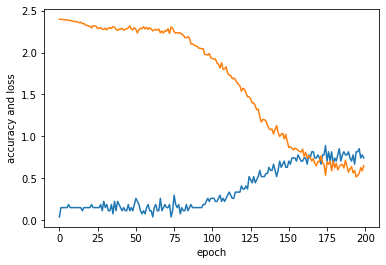

In [14]:
plt.plot(chatbot_model.history.history["accuracy"])
plt.plot(chatbot_model.history.history["loss"])
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")

In [15]:
chatbot_model.evaluate(x_train,y_train)

1/1 [==============================] - 4s 4s/step - loss: 0.5298 - accuracy: 0.7778


[0.5298226475715637, 0.7777777910232544]

In [16]:
chatbot_model.save('chatbot_model.h5')

In [25]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history=model.fit(x_train,y_train,epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 2.3965 - accuracy: 0.0370
Epoch 2/200
1/1 [==============================] - 0s 7ms/step - loss: 2.3948 - accuracy: 0.2222
Epoch 3/200
1/1 [==============================] - 0s 7ms/step - loss: 2.3931 - accuracy: 0.2222
Epoch 4/200
1/1 [==============================] - 0s 7ms/step - loss: 2.3914 - accuracy: 0.2593
Epoch 5/200
1/1 [==============================] - 0s 7ms/step - loss: 2.3898 - accuracy: 0.2593
Epoch 6/200
1/1 [==============================] - 0s 8ms/step - loss: 2.3882 - accuracy: 0.2593
Epoch 7/200
1/1 [==============================] - 0s 7ms/step - loss: 2.3865 - accuracy: 0.2593
Epoch 8/200
1/1 [==============================] - 0s 7ms/step - loss: 2.3849 - accuracy: 0.2593
Epoch 9/200
1/1 [==============================] - 0s 8ms/step - loss: 2.3832 - accuracy: 0.2593
Epoch 10/200
1/1 [==============================] - 0s 7ms/step - loss: 2.3815 - accuracy: 0.2593
Epoch 11/200
1/1 [============

In [18]:
model.evaluate(x_train,y_train)

1/1 [==============================] - 2s 2s/step - loss: 0.5474 - accuracy: 0.9259


[0.5474383234977722, 0.9259259104728699]

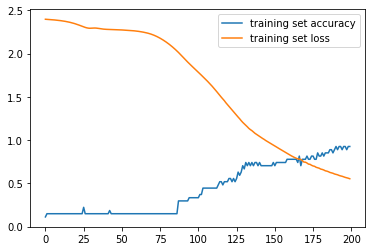

In [19]:
plt.plot(history.history['accuracy'],label='training set accuracy')
plt.plot(history.history['loss'],label='training set loss')
plt.legend()